In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [2]:
enercon = pd.read_csv('csv/enercon_result.csv')
suzlon = pd.read_csv('csv/suzlon_result.csv')
unison = pd.read_csv('csv/unison_result.csv')

In [3]:
row = ["1", "2",  "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
col = ["A", "B",  "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"]

In [4]:
def df(data):
    return pd.DataFrame(data.values.reshape(12,12), index=row, columns=col)

In [5]:
img=plt.imread("figure/background.png")

In [6]:
def heatmap(data, cmap, label, vmin, vmax, annot=True, fmt=".0f", title=None, size=8):
    
    fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(9,3),
                                            gridspec_kw={'width_ratios':[1,1,1,0.07]},
                                            constrained_layout=True)

    ax1.get_shared_y_axes().join(ax2,ax3)
    g1 = sns.heatmap(data[0],cmap=cmap,ax=ax1, square=True, cbar=False, lw=0.003, mask=(data[0] == 0),
                     linecolor="silver", annot_kws={'fontsize': size}, annot=annot,
                     fmt=fmt,
                     vmin=vmin, vmax=vmax, alpha = 0.7)
    g1.set_xlabel("a) Enercon")
    
    g2 = sns.heatmap(data[1], cmap=cmap,ax=ax2, square=True, cbar=False, lw=0.003, mask=(data[0] == 0),
                     linecolor="silver", annot_kws={'fontsize': size}, annot=annot,
                     fmt=fmt,
                     vmin=vmin, vmax=vmax, alpha = 0.7)
    g2.set_yticks([])
    g2.set_xlabel("b) Suzlon")
    
    g3 = sns.heatmap(data[2],cmap=cmap,ax=ax3, square=True, cbar_ax=ax4, lw=0.003, mask=(data[0] == 0),
                     linecolor="silver", annot_kws={'fontsize': size}, annot=annot,
                     fmt=fmt,
                     vmin=vmin, vmax=vmax, 
                     cbar_kws={'label': label}, alpha = 0.7)

    g3.set_yticks([])
    g3.set_xlabel("c) Unison")

    for ax in [g1,g2,g3]:
        tl = ax.get_xticklabels()
        ax.set_xticklabels(tl, rotation=0)
        tly = ax.get_yticklabels()
        ax.set_yticklabels(tly, rotation=0)
        ax.tick_params(top=True, bottom=False,
                       labeltop=True, labelbottom=False, color='white')
        ax.imshow(img, aspect = g1.get_aspect(),
              extent = g1.get_xlim() + g1.get_ylim(),
              zorder = -1)
        for edge, spine in ax.spines.items():
            spine.set_visible(True)

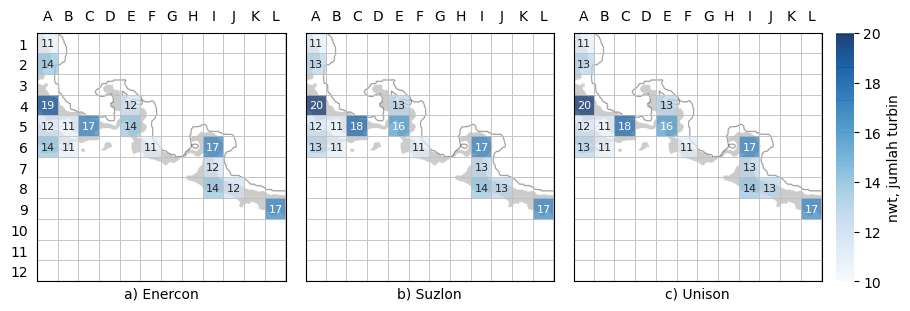

In [7]:
nwt = [df(data) for data in [enercon['nwt'], suzlon['nwt'], unison['nwt']]]
nwt = [nwt[x][nwt[x]>10].fillna(0) for x in range(3)]
heatmap(nwt, 'Blues', "nwt, jumlah turbin", vmin=10, vmax=20)

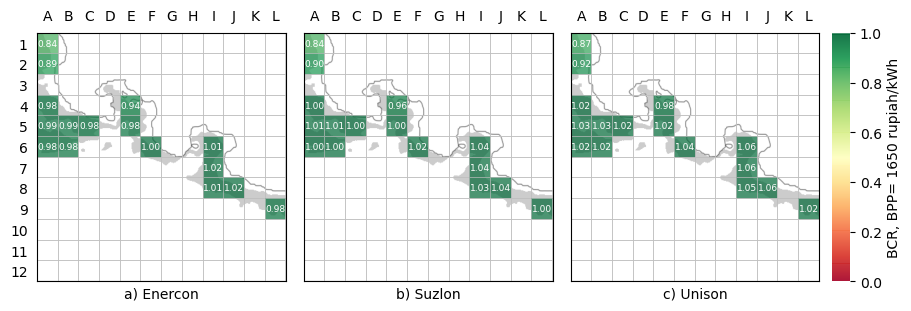

In [20]:
for turbine in [enercon, suzlon, unison]:
    turbine['BCR'] = turbine['BCR'].where(enercon['nwt']>10, 0)
    
BCR2 = [df(data) for data in [enercon['BCR'], suzlon['BCR'], unison['BCR']]]
heatmap(BCR2, 'RdYlGn', "BCR, BPP= 1650 rupiah/kWh", fmt=".2f", vmin=0, vmax=1, size=6.5)

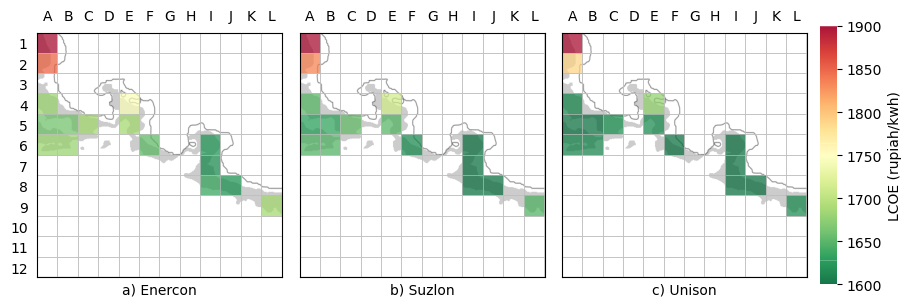

In [9]:
for turbine in [enercon, suzlon, unison]:
    turbine['LCOE (idr/kwh)'] = turbine['LCOE (idr/kwh)'].where(enercon['nwt']>10, 0)
    
lcoe = [df(data) for data in [enercon['LCOE (idr/kwh)'], suzlon['LCOE (idr/kwh)'], unison['LCOE (idr/kwh)']]]
heatmap(lcoe, 'RdYlGn_r', "LCOE (rupiah/kwh)", fmt=".2f", vmin=1600, vmax=1900, annot=False)

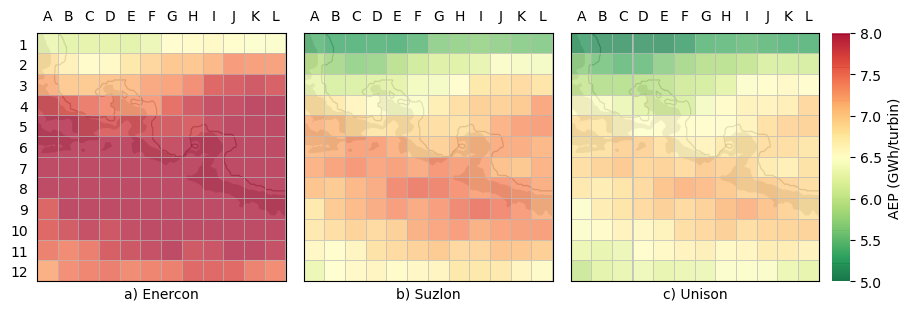

In [10]:
aep = [df(data) for data in [enercon['AEP (kWh)']/10**6, suzlon['AEP (kWh)']/10**6, unison['AEP (kWh)']/10**6]]
heatmap(aep, 'RdYlGn_r', "AEP (GWh/turbin)", fmt=".0f", vmin=5, vmax=8, annot=False)

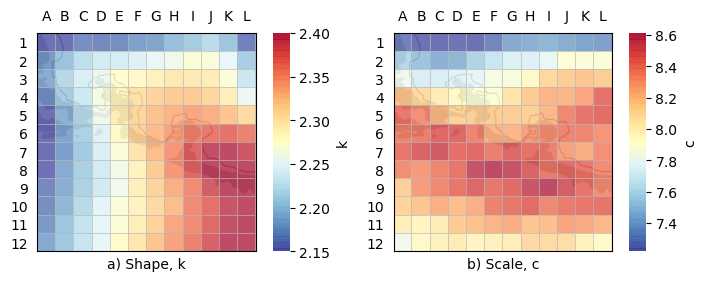

In [11]:
wind = pd.read_csv('csv/weibull_fitting.csv')
shape, scale = [df(wind[x]) for x in ['k','c']]

cmap='RdYlBu_r'

fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(7,2.7),
                                            gridspec_kw={'width_ratios':[1,0.07,1,0.07]},
                                            constrained_layout=True)

p1 = sns.heatmap(shape,cmap=cmap,ax=ax1, square=True, cbar_ax=ax2, lw=0.003,
                     linecolor="silver", annot_kws={'fontsize': 6}, annot=False,
                     vmin=2.15, vmax=2.4, 
                     cbar_kws={'label': 'k'}, alpha = 0.7)

p2 = sns.heatmap(scale,cmap=cmap,ax=ax3, square=True, cbar_ax=ax4, lw=0.003,
                     linecolor="silver", annot_kws={'fontsize': 6}, annot=False,
                     vmin=None, vmax=None, 
                     cbar_kws={'label': 'c'}, alpha = 0.7)

ax1.get_shared_y_axes().join(ax3)
    
p1.set_xlabel("a) Shape, k")
p2.set_xlabel("b) Scale, c")

for ax in [p1,p2]:
        tl = ax.get_xticklabels()
        ax.set_xticklabels(tl, rotation=0)
        tly = ax.get_yticklabels()
        ax.set_yticklabels(tly, rotation=0)
        ax.tick_params(top=True, bottom=False,
                       labeltop=True, labelbottom=False, color='white')
        ax.imshow(img, aspect = p1.get_aspect(),
              extent = p1.get_xlim() + p1.get_ylim(),
              zorder = -1)
        for edge, spine in ax.spines.items():
            spine.set_visible(True);

In [12]:
grid = enercon['Grid'].where(enercon['nwt']>10, 0)
grid = df(grid)
grid_to_int = {j:i for i,j in enumerate(pd.unique(grid.values.ravel()))}

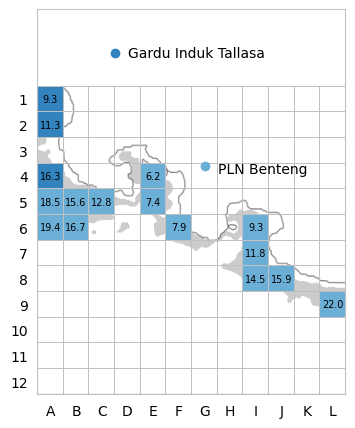

In [13]:
from matplotlib.colors import ListedColormap

lat_B, long_B = (-5.582, 119.569) # PLN Benteng
lat_T, long_T = (-5.463, 119.474) # Gardu Induk Tallasa

tl = (wind.loc[0]['lat']+ 0.027/2, wind.loc[0]['long']- 0.027/2) #coordinate 0,0 of map (top left)
Benteng_x, Benteng_y = [np.abs(tl[1] - long_B)/0.027, np.abs(tl[0] - lat_B)/0.027]
Tallasa_x, Tallasa_y = [np.abs(tl[1] - long_T)/0.027, np.abs(tl[0] - lat_T)/0.027]

distance = enercon['dt'].where(enercon['nwt']>10, 0)
distance = df(distance)

fig,(ax1) = plt.subplots(1,1, figsize=(4,5))

cmap2 = sns.color_palette("tab20c", 2)
d2 = sns.heatmap(grid.replace(grid_to_int), cmap=cmap2, ax=ax1, square=True, cbar=False, lw=0.003, mask=(grid.replace(grid_to_int))==1,
                     linecolor="silver", annot_kws={'fontsize': 6}, annot=False,
                     vmin=None, vmax=None)

d1 = sns.heatmap(distance, ax=ax1, square=True, cbar=False, cmap=ListedColormap(['White']),
                     annot_kws={'fontsize': 7, 'color': "black"}, annot=True, mask=(distance == 0),
                     vmin=None, vmax=None, fmt='0.1f',
                     cbar_kws={'label': 'k'}, alpha = 0);

tl = (wind.loc[0]['long']-0.027/2, wind.loc[0]['lat']+0.027/2)
tr = (wind.loc[11]['long']+0.027/2, wind.loc[11]['lat']+0.027/2)
bl = (wind.loc[132]['long']-0.027/2, wind.loc[132]['lat']-0.027/2)
br = (wind.loc[143]['long']+0.027/2, wind.loc[132]['lat']-0.027/2)

ax1.set_xlim(0,12)
ax1.set_ylim(12,-3)

ax1.scatter(Tallasa_x, Tallasa_y*-1, color=cmap2[0])
ax1.text(Tallasa_x+ 0.5, (Tallasa_y*-1)+0.2, 'Gardu Induk Tallasa')
ax1.scatter(Benteng_x, Benteng_y, color=cmap2[1])
ax1.text(Benteng_x+ 0.5, Benteng_y +0.3, 'PLN Benteng')

tl = ax1.get_xticklabels()
ax.set_xticklabels(tl, rotation=0)
tly = ax1.get_yticklabels()
ax1.set_yticklabels(tly, rotation=0)
ax1.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True, color='white')
ax1.imshow(img, aspect = p1.get_aspect(), extent = p1.get_xlim() + p1.get_ylim(), zorder = -1)
for edge, spine in ax1.spines.items():
    spine.set_visible(True)
    spine.set_color('silver');

In [14]:
kurs = 16755 * 1000

index = ['turbine', 'foundation', 'collection', 'integration', 'transmission', 'gridinterface', 'development']
turbine, foundation, collection, integration, transmission, gridinterface, development = [[0]*3 for x in range(7)]
for x, y in zip([0, 40, 80], [0, 1, 2]):
    turbine[y]  = unison.loc[x]['Cwt'] * kurs /10**9
    foundation[y] = unison.loc[x]['Cf'] * kurs /10**9
    collection[y] = unison.loc[x]['Ccs'] * kurs /10**9
    integration[y] = unison.loc[x]['Cis'] * kurs /10**9
    transmission[y] = unison.loc[x]['Cts'] * kurs /10**9
    gridinterface[y] = unison.loc[x]['Cse'] * kurs /10**9
    development[y] = unison.loc[x]['Cd'] * kurs /10**9
    
data = [turbine, foundation, collection, integration, transmission, gridinterface, development]
cost_loc = pd.DataFrame(data=data, index=index, columns=['A1', 'E4', 'I7']).transpose()

In [15]:
kurs = 16755 * 1000

index = ['turbine', 'foundation', 'collection', 'integration', 'transmission', 'gridinterface', 'development']
turbine, foundation, collection, integration, transmission, gridinterface, development = [[0]*3 for x in range(7)]
for x, y in zip([enercon, suzlon, unison], [0, 1, 2]):
    turbine[y]  = x.loc[80]['Cwt'] * kurs /10**9
    foundation[y] = x.loc[80]['Cf'] * kurs /10**9
    collection[y] = x.loc[80]['Ccs'] * kurs /10**9
    integration[y] = x.loc[80]['Cis'] * kurs /10**9
    transmission[y] = x.loc[80]['Cts'] * kurs /10**9
    gridinterface[y] = x.loc[80]['Cse'] * kurs /10**9
    development[y] = x.loc[80]['Cd'] * kurs /10**9
    
data = [turbine, foundation, collection, integration, transmission, gridinterface, development]
cost_turbine = pd.DataFrame(data=data, index=index, columns=['Enercon', 'Suzlon', 'Unsion']).transpose()